# The Sparks Foundation
## Graduate Rotational Internship Program (GRIP)
### Data Science &Business Analytics Internship
### Auther : Shraddha Tarawade
## Task 7 - Stock Market Prediction using Numerical and Textual Analysis
    Data set : https://bit.ly/36fFPI6

#### ● Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
#### ● Stock to analyze and predict - SENSEX (S&P BSE SENSEX)
#### ● Download historical stock prices from finance.yahoo.com
#### ● Download textual (news) data from https://bit.ly/36fFPI6
#### ● Use either R or Python, or both for separate analysis and then combine the findings to create a hybrid model
#### ● You are free to select a different stock to analyze and news dataset as well while not changing the objective of the task.

In [298]:
pip install yfinance --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [299]:
%pip install altair vega_datasets

Note: you may need to restart the kernel to use updated packages.


### 1. Importing the required libraries

In [300]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt  #Altair is a declarative statistical visualization library for Python

import statsmodels.api as sm 

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [301]:
import yfinance as yf
bse_data = yf.download('^BSESN', start='2015-01-01', end='2021-07-10')
unseenbse_data = yf.download('^BSESN', start='2021-07-09', end='2021-07-10')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [302]:
bse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [303]:
unseenbse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [304]:
bse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [305]:
unseenbse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [306]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1602 entries, 2015-01-02 to 2021-07-09
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1602 non-null   float64
 1   high      1602 non-null   float64
 2   low       1602 non-null   float64
 3   close     1602 non-null   float64
 4   adjclose  1602 non-null   float64
 5   volume    1602 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 87.6 KB


In [307]:
unseenbse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2021-07-09 to 2021-07-09
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1 non-null      float64
 1   high      1 non-null      float64
 2   low       1 non-null      float64
 3   close     1 non-null      float64
 4   adjclose  1 non-null      float64
 5   volume    1 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 56.0 bytes


In [308]:
bse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [309]:
bse_data.tail()

,open,high,low,close,adjclose,volume
Date,,,,,,
2021-07-05,52682.890625,52919.171875,52604.351562,52880.000000,52880.000000,7600
2021-07-06,52874.851562,53129.371094,52804.179688,52861.179688,52861.179688,7000
2021-07-07,52919.710938,53105.410156,52751.761719,53054.761719,53054.761719,8000
2021-07-08,53065.691406,53103.031250,52428.839844,52568.941406,52568.941406,6400
2021-07-09,52508.238281,52555.730469,52228.011719,52386.191406,52386.191406,6400


In [310]:
unseenbse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2021-07-09,52508.238281,52555.730469,52228.011719,52386.191406,52386.191406,6400


In [311]:
bse_data.reset_index(inplace=True)

In [312]:
bse_data.rename(columns={'Date': 'date'}, inplace = True)

In [313]:
bse_data.head()

,date,open,high,low,close,adjclose,volume
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [314]:
unseenbse_data.reset_index(inplace=True)

In [315]:
unseenbse_data.rename(columns={'Date': 'date'}, inplace = True)

In [316]:
unseenbse_data.head()

,date,open,high,low,close,adjclose,volume
0,2021-07-09,52508.238281,52555.730469,52228.011719,52386.191406,52386.191406,6400


In [317]:
bse_data['date'] = pd.to_datetime(bse_data['date'], format = '%Y%m%d')

In [318]:
unseenbse_data['date'] = pd.to_datetime(unseenbse_data['date'], format = '%Y%m%d')

In [433]:
#before moving forward let us calculate first the actual price
unseenbsedata_price = round((unseenbse_data['high'] + unseenbse_data['low'] + unseenbse_data['close'])/ 3, 2)
unseenbsedata_price  #actual price

0    52389.98
dtype: float64

### 2. Rolling window analysis of time series

In [319]:
def stock_weekmovingavg(wks, df):
  dateclose_data = pd.DataFrame({'date': df['date'], 'close':df['close']})
  dateclose_data.set_index('date', inplace=True)
  num = wks * 5                                 #calculating the number of days in the week. 5 days because BSE is open for 5 days / week
  dateclose_data['movingavg'] = dateclose_data['close'].rolling(window=num).mean().shift()
  return dateclose_data.dropna()

In [320]:
stock_weekmovingavg(4, bse_data).head()

,close,movingavg
date,,
2015-02-02,29122.269531,28256.509570
2015-02-03,29000.140625,28318.228027
2015-02-04,28883.109375,28376.119043
2015-02-05,28850.970703,28470.901465
2015-02-06,28717.910156,28568.008984


<AxesSubplot:xlabel='date'>

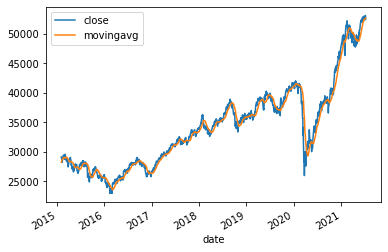

In [321]:
stock_weekmovingavg(4, bse_data).plot()

In [322]:
altdata_fourweek = stock_weekmovingavg(4, bse_data)
altdata_fourweek.reset_index(inplace=True)
altdata_fourweek.rename(columns={list(altdata_fourweek)[0]:'date'}, inplace=True)

In [323]:
alt.Chart(altdata_fourweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

In [324]:
stock_weekmovingavg(16, bse_data).head()

,close,movingavg
date,,
2015-05-05,27440.140625,28447.880933
2015-05-06,26717.369141,28442.283936
2015-05-07,26599.109375,28428.222046
2015-05-08,27105.390625,28423.367651
2015-05-11,27507.300781,28425.824780


<AxesSubplot:xlabel='date'>

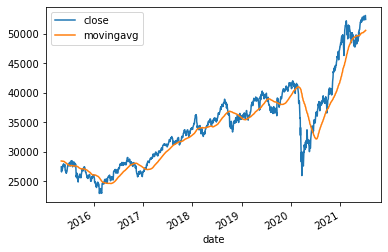

In [325]:
stock_weekmovingavg(16, bse_data).plot()

In [326]:
altdata_sixteenweek = stock_weekmovingavg(16, bse_data)
altdata_sixteenweek.reset_index(inplace=True)
altdata_sixteenweek.rename(columns={list(altdata_sixteenweek)[0]:'date'}, inplace=True)

In [327]:
alt.Chart(altdata_sixteenweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

In [328]:
stock_weekmovingavg(52, bse_data).head()

,close,movingavg
date,,
2016-01-25,24485.949219,27198.907963
2016-01-27,24492.390625,27185.823535
2016-01-28,24469.570312,27172.939190
2016-01-29,24870.689453,27163.254995
2016-02-01,24824.830078,27155.416031


<AxesSubplot:xlabel='date'>

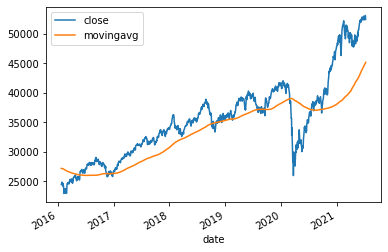

In [329]:
stock_weekmovingavg(52, bse_data).plot()

In [330]:
altdata_fiftytwoweek = stock_weekmovingavg(52, bse_data)
altdata_fiftytwoweek.reset_index(inplace=True)
altdata_fiftytwoweek.rename(columns={list(altdata_fiftytwoweek)[0]:'date'}, inplace=True)

In [331]:
alt.Chart(altdata_fiftytwoweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

### 3. Creating a rolling window of size 10 and 50 of the BSE index

In [332]:
def rollingwindows(days, df):
  data = df.filter(['date','open','high','low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  rollingwindows_data = data.rolling(window=days).mean().shift()
  return rollingwindows_data.dropna()

In [333]:
rollingwindows(10, bse_data).head()

,open,high,low,close
date,,,,
2015-01-16,27515.904883,27657.483008,27279.612891,27479.296484
2015-01-19,27569.437891,27681.345898,27322.217969,27502.695508
2015-01-20,27596.578906,27708.302930,27363.268945,27544.664453
2015-01-21,27659.640820,27821.338867,27502.047852,27724.385352
2015-01-22,27845.606836,28011.988867,27703.692969,27922.389258


<AxesSubplot:xlabel='date'>

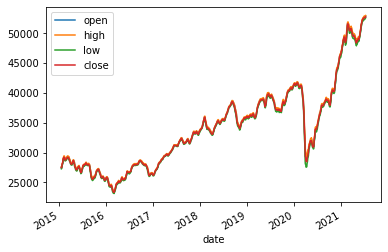

In [334]:
rollingwindows(10, bse_data).plot()

In [335]:
altdata_tendays = rollingwindows(10, bse_data)
altdata_tendays.reset_index(inplace=True)
altdata_tendays.rename(columns={list(altdata_tendays)[0]:'date'}, inplace=True)

In [336]:
alt.Chart(altdata_tendays).mark_point().encode(
    x ='date',
    y = 'close'
)

alt.Chart(...)

In [337]:
rollingwindows(50, bse_data).head()

,open,high,low,close
date,,,,
2015-03-18,28721.847383,28863.956836,28502.767422,28670.602461
2015-03-19,28746.759180,28881.346836,28523.317422,28685.286836
2015-03-20,28763.295000,28899.631836,28535.814414,28697.833828
2015-03-23,28778.719180,28915.340430,28561.266406,28723.306211
2015-03-24,28805.396367,28942.011250,28589.022031,28748.970195


<AxesSubplot:xlabel='date'>

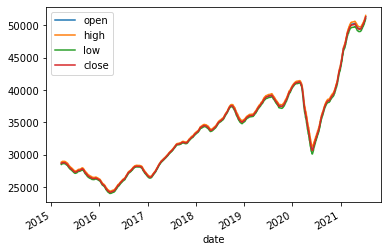

In [338]:
rollingwindows(50, bse_data).plot()

### 4. Creating the dummy time series:
Volume shocks : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether volume traded is 10% higher/lower than previous day. ( 0/1 dummy-coding is for direction of shock)

In [339]:
def boolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data['percentchg'] = (data[col].pct_change()) * 100  #percentage change compare to previous volume using pct_change() function
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(col, axis = 1, inplace = True)
  return data.dropna()

In [340]:
boolean_shock(10, bse_data, 'volume')

,percentchg,shock
date,,
2015-01-05,24.324324,1
2015-01-06,53.260870,1
2015-01-07,-13.475177,0
2015-01-08,-32.786885,0
2015-01-09,35.365854,1
...,...,...
2021-07-05,18.750000,1
2021-07-06,-7.894737,0
2021-07-07,14.285714,1


In [341]:
altdata_volpercentchg = boolean_shock(10, bse_data, 'volume')
altdata_volpercentchg.reset_index(inplace=True)
altdata_volpercentchg.rename(columns={list(altdata_volpercentchg)[0]:'date'}, inplace=True)

In [342]:
alt.Chart(altdata_volpercentchg).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

In [343]:
boolean_shock(2, bse_data, 'close')

,percentchg,shock
date,,
2015-01-05,-0.163440,0
2015-01-06,-3.070360,0
2015-01-07,-0.291397,0
2015-01-08,1.359742,0
2015-01-09,0.673407,0
...,...,...
2021-07-05,0.753226,0
2021-07-06,-0.035591,0
2021-07-07,0.366208,0


In [344]:
altdata_closepercentchg2 = boolean_shock(2, bse_data, 'close')
altdata_closepercentchg2.reset_index(inplace=True)
altdata_closepercentchg2.rename(columns={list(altdata_closepercentchg2)[0]:'date'}, inplace=True)

In [345]:
alt.Chart(altdata_closepercentchg2).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

### 5. Pricing shock without volume shock

In [346]:
def priceboolean_shock(percent, df):
  df['date'] = pd.to_datetime(df['date'])
  data = df.filter(['date', 'high', 'low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data['priceavg'] = (data['high'] + data['low'] + data['close']) / 3
  data['shock'] = (data['priceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
  return data

In [347]:
priceboolean_shock(10, bse_data)

,priceavg,shock
date,,
2015-01-02,27781.543620,0
2015-01-05,27897.886719,0
2015-01-06,27207.817057,0
2015-01-07,26912.179688,0
2015-01-08,27231.020182,0
...,...,...
2021-07-05,52801.174479,0
2021-07-06,52931.576823,0
2021-07-07,52970.644531,0


In [348]:
altdata_pricepercentchg = priceboolean_shock(10, bse_data)
altdata_pricepercentchg.reset_index(inplace=True)
altdata_pricepercentchg.rename(columns={list(altdata_pricepercentchg)[0]:'date'}, inplace=True)

In [349]:
alt.Chart(altdata_pricepercentchg).mark_point().encode(
    x='date',
    y='priceavg'
)

alt.Chart(...)

### 6. Creating the reverse dummy time series:

In [350]:
def reverseboolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['percentchg'] = (data[col].pct_change()) * 100
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x > percent else 0)
  data.drop(col, axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [351]:
reverseboolean_shock(2, bse_data, 'close')

,percentchg,shock
date,,
2015-01-02,0.163708,0
2015-01-05,3.167617,1
2015-01-06,0.292249,0
2015-01-07,-1.341501,0
2015-01-08,-0.668903,0
...,...,...
2021-07-02,-0.747595,0
2021-07-05,0.035603,0
2021-07-06,-0.364872,0


In [352]:
altdata_closepercentchg = reverseboolean_shock(2, bse_data, 'close')
altdata_closepercentchg.reset_index(inplace=True)
altdata_closepercentchg.rename(columns={list(altdata_closepercentchg)[0]:'date'}, inplace=True)

In [353]:
alt.Chart(altdata_closepercentchg).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

In [354]:
reverseboolean_shock(5, bse_data, 'close')

,percentchg,shock
date,,
2015-01-02,0.163708,0
2015-01-05,3.167617,0
2015-01-06,0.292249,0
2015-01-07,-1.341501,0
2015-01-08,-0.668903,0
...,...,...
2021-07-02,-0.747595,0
2021-07-05,0.035603,0
2021-07-06,-0.364872,0


In [355]:
altdata_closepercentchg5 = reverseboolean_shock(5, bse_data, 'close')
altdata_closepercentchg5.reset_index(inplace=True)
altdata_closepercentchg5.rename(columns={list(altdata_closepercentchg5)[0]:'date'}, inplace=True)

In [356]:
alt.Chart(altdata_closepercentchg5).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

In [357]:
def pricereverseboolean_shock(percent, df):
  data = df.filter(['date', 'high', 'low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['reversepriceavg'] = (data['high'] + data['low'] + data['close']) / 3
  data['shock'] = (data['reversepriceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [358]:
pricereverseboolean_shock(2, bse_data)

,reversepriceavg,shock
date,,
2015-01-02,27781.543620,0
2015-01-05,27897.886719,1
2015-01-06,27207.817057,0
2015-01-07,26912.179688,0
2015-01-08,27231.020182,0
...,...,...
2021-07-05,52801.174479,0
2021-07-06,52931.576823,0
2021-07-07,52970.644531,0


In [359]:
altdata_reversepricepercentchg = pricereverseboolean_shock(2, bse_data)
altdata_reversepricepercentchg.reset_index(inplace=True)
altdata_reversepricepercentchg.rename(columns={list(altdata_reversepricepercentchg)[0]:'date'}, inplace=True)

In [360]:
alt.Chart(altdata_reversepricepercentchg).mark_point().encode(
    x='date',
    y='reversepriceavg'
)

alt.Chart(...)

### 7. Textual Analysis of news from Times of India News Headlines

In [361]:
#reading the uploaded csv file and assigning to news variable
news  = pd.read_csv(r'C:\Users\shrad\Desktop\Data Science\SparkFoundation\Untitled Folder 1\india-news-headlines.csv')

In [362]:
news.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [363]:
news.shape

(3424067, 3)

In [364]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [365]:
#converting publish_date column to 
news['publish_date'] = pd.to_datetime(news['publish_date'], format = '%Y%m%d')

In [366]:
#first 5 rows content of the dataset
news.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [367]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 78.4+ MB


In [368]:
#finding unique values in headline_category
news['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'elections.assembly-elections.bihar',
       'astrology.horoscope.monthly', 'astrology.numerology-tarot'],
      dtype=object)

In [369]:
#checking all the values count (unique values total count)
news['headline_category'].value_counts()

india                                          288541
unknown                                        209582
city.mumbai                                    134428
city.delhi                                     127717
business.india-business                        116761
                                                ...  
2013-the-year-sachin-bids-adieu.tennis-2013         8
scorecard-and-statistics                            8
sports.cricket.icc-world-cup.teams.england          8
sports.asian-games-2018                             8
lifespan-news                                       8
Name: headline_category, Length: 1013, dtype: int64

In [370]:
#total unique values count
news['headline_category'].value_counts().count()

1013

In [371]:
#checking all the values count (unique values total count)
news['headline_text'].value_counts()

Straight Answers                                      6723
Cartoons                                              1536
Straight answers                                      1500
Photogallery                                          1353
Your say                                              1012
                                                      ... 
PSUs seek to stop staff exodus                           1
Anna Hazare discharged; goes home to rest                1
BJP demands Tej's dismissal for no-show                  1
Self-made industrialists shine                           1
Pro-Qadri website registered on fake India address       1
Name: headline_text, Length: 3168800, dtype: int64

In [372]:
news['headline_text'].value_counts().count()

3168800

In [373]:
news.isnull().sum().sum()

0

In [374]:
#finding if any duplicate values are present
news.duplicated().sum()

24191

In [375]:
#rough checking by marking all duplicates as True. Default is first which marks duplicates as True except for the first occurrence.
news.duplicated(keep=False).sum()

46130

In [376]:
cols = list(news.columns)
news.sort_values(by=cols, inplace=True, ignore_index=True)

In [377]:
news[news.duplicated(keep=False)]

,publish_date,headline_category,headline_text
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,America's unwanted heading for India?
5,2001-01-02,unknown,America's unwanted heading for India?
6,2001-01-02,unknown,America's unwanted heading for India?
9,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
...,...,...,...
3421893,2020-12-27,city.nagpur,Govt forcing helpless sr citizens to fight leg...
3422119,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422120,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422956,2020-12-29,city.pune,PMC to draft separate DP after 23 villages' me...


In [378]:
#dropping the duplicates only keeping the last value (ordinally last row from sorted) of each duplicates
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [379]:
#re-checking everything worked well with drop_duplicates() carried out earlier on the dataset
news.duplicated().sum()

0

In [380]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [381]:
from textblob import TextBlob

In [382]:
#getting a list of unique dates in publish_date column
lst = news['publish_date'].value_counts().index.tolist()

In [383]:
#concatenating all the headline_text column values of same date in publish_date column
new = []
for x in lst:
  df = news.loc[news['publish_date'] == x]
  headlinetext = ''
  publishdate = str(x)
  headlinetext = df['headline_text'].iloc[0]
  for i in range(1 , len(df)):
    headlinetext = headlinetext + '. '+ str(df['headline_text'].iloc[i])  
  new.append(headlinetext)

In [384]:
#creating a new dataset
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' : new})

In [385]:
newsdf.head()

,publish_date,headline_text
0,2014-12-15,Golden Homes III. Golden Panorama. Hanging Gar...
1,2014-12-21,Eight companies add Rs 55;171 crore in m-cap; ...
2,2014-12-09,Audi-Vredestein driving experience. Benelli TN...
3,2014-11-29,6 CARE IPO merchant bankers fined Rs 1 crore. ...
4,2014-11-01,Chetan Bhagat: Cleanliness begins at home. Gau...


In [386]:
#sorting the dataset based on dates
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)

In [387]:
newsdf.head()

,publish_date,headline_text
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...
4,2001-01-06,Anti-immigration think-tank berates Clinton re...


In [388]:
newsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7262 entries, 0 to 7261
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   publish_date   7262 non-null   datetime64[ns]
 1   headline_text  7262 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 113.6+ KB


In [389]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [390]:
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity

In [391]:
newsdf.head()

,publish_date,headline_text,polarity,subjectivity
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...,0.193519,0.293056
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...,0.088462,0.407692
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...,0.091426,0.481895
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...,0.257415,0.465542
4,2001-01-06,Anti-immigration think-tank berates Clinton re...,0.219481,0.464935


In [392]:
#finding if any null values are present
newsdf.isnull().sum().sum()

0

In [393]:
#renameing the publish_date to date so it will help us during joining this dataset with bse_data dataset
newsdf.rename(columns={'publish_date': 'date'}, inplace = True)

In [394]:
#selecting required columns
newsdf = newsdf.filter(['date', 'polarity', 'subjectivity'], axis=1)

In [395]:
newsdf.shape

(7262, 3)

In [396]:
newsdf['date'].duplicated().sum()

0

In [397]:
bse_data.shape

(1602, 7)

In [398]:
bse_data['date'].duplicated().sum()

0

In [399]:
bse_data = pd.merge(bse_data, newsdf, how='left', on=['date'])

In [400]:
bse_data.head()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400,0.055586,0.455251
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200,0.100081,0.433132
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100,0.055802,0.386579
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200,0.034707,0.386916
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200,0.060173,0.408416


In [401]:
bse_data.isnull().sum().sum()

256

### 8. Preparing the dataset for machine learning

In [402]:
bse_data.loc[len(bse_data)] = ['2020-06-30', bse_data['open'].mean(), bse_data['high'].mean(), bse_data['low'].mean(),
                       bse_data['close'].mean(), bse_data['adjclose'].mean(), bse_data['volume'].median(), newsdf['polarity'].mean(), newsdf['subjectivity'].mean() ]

In [403]:
#converting date from object dtype to datetime dtype
bse_data['date'] = pd.to_datetime(bse_data['date'], format="%Y-%m-%d")

In [404]:
bse_data.tail()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
1598,2021-07-06,52874.851562,53129.371094,52804.179688,52861.179688,52861.179688,7000.0,NaN,NaN
1599,2021-07-07,52919.710938,53105.410156,52751.761719,53054.761719,53054.761719,8000.0,NaN,NaN
1600,2021-07-08,53065.691406,53103.031250,52428.839844,52568.941406,52568.941406,6400.0,NaN,NaN
1601,2021-07-09,52508.238281,52555.730469,52228.011719,52386.191406,52386.191406,6400.0,NaN,NaN
1602,2020-06-30,34172.176073,34334.164838,33925.432208,34124.447296,34124.447296,13400.0,0.069503,0.403839


In [405]:
bse_data["month"] = bse_data['date'].dt.month
bse_data["day"] = bse_data['date'].dt.day
bse_data["dayofweek"] = bse_data['date'].dt.dayofweek
bse_data["week"] = bse_data['date'].dt.week
bse_data['movingavg4weeks'] = round(bse_data['close'].rolling(window=(4*5), min_periods = 1).mean().shift(),2)
bse_data['movingavg16weeks'] = round(bse_data['close'].rolling(window=(16*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 4 weeks 
bse_data['movingavg28weeks'] = round(bse_data['close'].rolling(window=(28*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 16 weeks
bse_data['movingavg40weeks'] = round(bse_data['close'].rolling(window=(40*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 28 weeks
bse_data['movingavg52weeks'] = round(bse_data['close'].rolling(window=(52*5), min_periods = 1).mean().shift(),2)  #add 12 weeks to 40 weeks
bse_data['window10days'] = round(bse_data['close'].rolling(window = 10, min_periods = 1).mean().shift(),2)  
bse_data['window50days'] = round(bse_data['close'].rolling(window = 50, min_periods = 1).mean().shift(),2)
bse_data['volumeshock'] = round(boolean_shock(10, bse_data, 'volume').reset_index()['shock'], 2)
bse_data['priceshock'] = round(priceboolean_shock(10, bse_data).reset_index()['shock'], 2)
bse_data['polarity'] = round(bse_data['polarity'] , 2)
bse_data['subjectivity'] = round(bse_data['subjectivity'] , 2)
bse_data['price'] = round((bse_data['high'] + bse_data['low'] + bse_data['close']) / 3 , 2)
bse_data['close'] = round(bse_data['close'] , 2)

In [406]:
bse_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume',
       'polarity', 'subjectivity', 'month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'priceshock', 'price'],
      dtype='object')

In [407]:
bse_data.head()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity,month,...,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,priceshock,price
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.90,27887.900391,7400.0,0.06,0.46,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,27781.54
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.32,27842.320312,9200.0,0.10,0.43,1,...,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0,0,27897.89
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.46,26987.460938,14100.0,0.06,0.39,1,...,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,0.0,0,27207.82
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.82,26908.820312,12200.0,0.03,0.39,1,...,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,0.0,0,26912.18
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.71,27274.710938,8200.0,0.06,0.41,1,...,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,1.0,0,27231.02


In [408]:
#fillinf the null columns
bse_data.fillna(method = 'bfill', inplace = True)

In [409]:
#fillinf the null columns
bse_data.fillna(method = 'ffill', inplace = True)

In [410]:
#finding if any null values are present
bse_data.isnull().sum().sum()

0

In [411]:
#selecting specific columns
bse_data = bse_data.filter(['month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
       'priceshock',  'polarity', 'subjectivity', 'price', 'close'], axis=1)

In [412]:
bse_data.head()

,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,priceshock,polarity,subjectivity,price,close
0,1,2,4,1,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0,0,0.06,0.46,27781.54,27887.90
1,1,5,0,2,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0,0,0.10,0.43,27897.89,27842.32
2,1,6,1,2,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,0.0,0,0.06,0.39,27207.82,26987.46
3,1,7,2,2,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,0.0,0,0.03,0.39,26912.18,26908.82
4,1,8,3,2,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,1.0,0,0.06,0.41,27231.02,27274.71


In [413]:
#separating the predicted date row from main dataset after getting all the calculated average values
main_bsedata = bse_data.iloc[:1345,:].reset_index()  
newtestunseen_bsedata = bse_data.iloc[1345:,:].reset_index()

In [414]:
main_bsedata.shape

(1345, 18)

In [415]:
newtestunseen_bsedata.shape

(258, 18)

In [416]:
newtestunseen_bsedata.head()

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,priceshock,polarity,subjectivity,price,close
0,1345,6,30,1,27,34278.20,32331.09,36094.84,36953.09,37293.01,34623.85,32643.94,0.0,0,0.07,0.38,34987.50,34915.80
1,1346,7,1,2,27,34332.71,32288.82,36053.70,36941.00,37273.13,34754.91,32710.48,0.0,0,0.06,0.36,35269.63,35414.45
2,1347,7,2,3,27,34397.96,32254.70,36014.87,36935.26,37257.31,34945.57,32785.81,0.0,0,0.04,0.44,35817.99,35843.70
3,1348,7,3,4,27,34491.11,32219.95,35979.62,36930.86,37242.80,35109.13,32889.95,1.0,0,0.06,0.36,36001.34,36021.42
4,1349,7,6,0,28,34577.81,32190.10,35948.02,36927.74,37228.32,35238.10,32982.78,0.0,0,0.04,0.41,36467.65,36487.28


### 9. Training the model and predicting the price

In [417]:
X = main_bsedata.drop(['price','close'], axis = 1)
y = main_bsedata[['price','close']]

In [418]:
Xnewtestunseen = newtestunseen_bsedata.drop(['price','close'], axis = 1)
ynewtestunseen_ans = newtestunseen_bsedata[['price','close']]

In [421]:
X.shape, y.shape

((1345, 16), (1345, 2))

In [422]:
split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [423]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1076, 16), (1076, 2), (269, 16), (269, 2))

In [424]:
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth = 30, min_samples_leaf=2, min_samples_split=5, n_jobs=1)

In [425]:
chainedmodel = RegressorChain(rfg)
chainedmodel.fit(X_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(max_depth=30,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    n_estimators=500, n_jobs=1,
                                                    random_state=42))

In [426]:
pred = chainedmodel.predict(X_test)
roundpred = []
for x in range(len(pred)):
  roundpred.append([round(pred[x][0], 2),round(pred[x][1], 2) ])

In [427]:
r2_score(y_test, roundpred)

0.9946241854491651

In [428]:
#evaluating the performance of the model
#MAE
print('MAE')
print(mean_absolute_error(y_test, roundpred), end='\n')
#MSE
print('MSE')
print(mean_squared_error(y_test, roundpred), end='\n')
#RMSE
print('RMSE')
print(np.sqrt(mean_squared_error(y_test, roundpred)))

MAE
255.72842007434934
MSE
130290.57194219332
RMSE
360.9578534153168


In [429]:
pred_newtestunseen = chainedmodel.predict(Xnewtestunseen)

In [430]:
[(round(pred_newtestunseen[0][0], 2)),(round(pred_newtestunseen[0][1], 2))]

[35080.88, 35028.02]

In [431]:
ynewtestunseen_ans

,price,close
0,34987.50,34915.80
1,35269.63,35414.45
2,35817.99,35843.70
3,36001.34,36021.42
4,36467.65,36487.28
...,...,...
253,52931.58,52861.18
254,52970.64,53054.76
255,52700.27,52568.94
256,52389.98,52386.19


In [434]:
[unseenbsedata_price[0] , round(unseenbse_data['close'],2)[0]]

[52389.98, 52386.19]